In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from DQN_Acrobot import *

Using TensorFlow backend.


In [3]:
env = gym.make('Acrobot-v1')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [4]:
agent = DQNAgent(env)

Model Evaluation Result at Episode 21, Time step 10425
Avg Reward in 10 Episodes: -480.8
Avg Time Step Each Episode: 481.2
Final Result: -480.8
Epsilon: 0.9009625
-------------------------------------------
Model Evaluation Result at Episode 41, Time step 20240
Avg Reward in 10 Episodes: -321.3
Avg Time Step Each Episode: 322.3
Final Result: -321.3
Epsilon: 0.80772
-------------------------------------------
Model Evaluation Result at Episode 65, Time step 30460
Avg Reward in 10 Episodes: -174.9
Avg Time Step Each Episode: 175.9
Final Result: -174.9
Epsilon: 0.7106300000000001
-------------------------------------------
Model Evaluation Result at Episode 89, Time step 40396
Avg Reward in 10 Episodes: -179.5
Avg Time Step Each Episode: 180.5
Final Result: -174.9
Epsilon: 0.6162380000000001
-------------------------------------------
Model Evaluation Result at Episode 117, Time step 50471
Avg Reward in 10 Episodes: -383.2
Avg Time Step Each Episode: 383.8
Final Result: -174.9
Epsilon: 0.

Model Evaluation Result at Episode 3720, Time step 410052
Avg Reward in 10 Episodes: -73.6
Avg Time Step Each Episode: 74.6
Final Result: -65.8
Epsilon: 0.05
-------------------------------------------
Model Evaluation Result at Episode 3835, Time step 420014
Avg Reward in 10 Episodes: -78.9
Avg Time Step Each Episode: 79.9
Final Result: -65.8
Epsilon: 0.05
-------------------------------------------
Model Evaluation Result at Episode 3949, Time step 430027
Avg Reward in 10 Episodes: -82.3
Avg Time Step Each Episode: 83.3
Final Result: -65.8
Epsilon: 0.05
-------------------------------------------
Model Evaluation Result at Episode 4067, Time step 440048
Avg Reward in 10 Episodes: -120.7
Avg Time Step Each Episode: 121.6
Final Result: -65.8
Epsilon: 0.05
-------------------------------------------
Model Evaluation Result at Episode 4181, Time step 450051
Avg Reward in 10 Episodes: -75.5
Avg Time Step Each Episode: 76.5
Final Result: -65.8
Epsilon: 0.05
--------------------------------

Model Evaluation Result at Episode 8611, Time step 820019
Avg Reward in 10 Episodes: -72.6
Avg Time Step Each Episode: 73.6
Final Result: -62.0
Epsilon: 0.05
-------------------------------------------
Model Evaluation Result at Episode 8735, Time step 830088
Avg Reward in 10 Episodes: -73.6
Avg Time Step Each Episode: 74.6
Final Result: -62.0
Epsilon: 0.05
-------------------------------------------
Model Evaluation Result at Episode 8854, Time step 840006
Avg Reward in 10 Episodes: -89.2
Avg Time Step Each Episode: 90.2
Final Result: -62.0
Epsilon: 0.05
-------------------------------------------
Model Evaluation Result at Episode 8974, Time step 850001
Avg Reward in 10 Episodes: -69.9
Avg Time Step Each Episode: 70.9
Final Result: -62.0
Epsilon: 0.05
-------------------------------------------
Model Evaluation Result at Episode 9091, Time step 860037
Avg Reward in 10 Episodes: -81.5
Avg Time Step Each Episode: 82.5
Final Result: -62.0
Epsilon: 0.05
----------------------------------

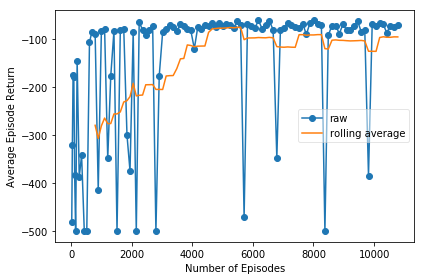

In [5]:
agent.run_experiment()